# Supervised Learning - Project Submission

## Part A

<b>DOMAIN:</b> Medical

<b>CONTEXT:</b> Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

<b>DATA DESCRIPTION:</b> The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

<b>PROJECT OBJECTIVE:</b> To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

### <b> 1. Data Understanding: </b>

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("Normal.csv")
df2 = pd.read_csv("Type_H.csv")
df3 = pd.read_csv("Type_S.csv")

In [3]:
print(df1.shape, df1.columns)
print(df2.shape, df2.columns)
print(df3.shape, df3.columns)

(100, 7) Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
(60, 7) Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
(150, 7) Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


Based on the data above, the 3 DataFrames visibly have the same Column names and also in the same order. We will additionally compare the columns and confirm using the head() function.

In [4]:
print("Columns comparison between df1 and df2:", df1.columns.equals(df2.columns))
print("Columns comparison between df2 and df3:", df2.columns.equals(df3.columns))
print("Columns comparison between df1 and df3:", df1.columns.equals(df3.columns))

Columns comparison between df1 and df2: True
Columns comparison between df2 and df3: True
Columns comparison between df1 and df3: True


In [5]:
print("Head of df1:")
print(df1.head())

print("\nHead of df2:")
print(df2.head())

print("\nHead of df3:")
print(df3.head())

Head of df1:
   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

Head of df2:
   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

Head of df3:
   P_incidence   

Information above further confirms that the 3 DataFrames indeed have the same Column names and are also present in the same order.

In [6]:
print("Data types of df1:")
print(df1.dtypes)

print("\nData types of df2:")
print(df2.dtypes)

print("\nData types of df3:")
print(df3.dtypes)

Data types of df1:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data types of df2:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data types of df3:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


All 3 DataFrames have the same data type. All columns have float values except the feature "Class" which has object and hence is a Categorical variable. "Class" is also the target variable for this project.

In [7]:
df1['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [8]:
df2['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [9]:
df3['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

- In `df1`, the class variable has two values: "Normal" and "Nrmal". However, these values mean the same, so we need to standardize them by replacing "Nrmal" with "Normal".
- In `df2`, the class variable has two values: "Type_H" and "type_h". Similarly, these values are the same and we need to standardize them by replacing "type_h" with "Type_H".
- In `df3` as well, the class variable has two values: "Type_S" and "tp_s". These values are identical and hence we need to standardize them by replacing "tp_s" with "Type_S".

### <b> 2. Data Preparation and Exploration: </b>

In [10]:
# Replacing variations in 'Class' feature in df1
df1['Class'] = df1['Class'].replace('Nrmal', 'Normal')

# Replacing variations in 'Class' feature in df2
df2['Class'] = df2['Class'].replace('type_h', 'Type_H')

# Replacing variations in 'Class' feature in df3
df3['Class'] = df3['Class'].replace('tp_s', 'Type_S')

In [11]:
df1['Class'].value_counts()

Normal    100
Name: Class, dtype: int64

In [12]:
df2['Class'].value_counts()

Type_H    60
Name: Class, dtype: int64

In [13]:
df3['Class'].value_counts()

Type_S    150
Name: Class, dtype: int64

<b> Combining all the 3 DataFrames to form a single DataFrame.

In [14]:
combined_df = pd.concat([df1, df2, df3])
print(combined_df)

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4    

In [15]:
print(combined_df.sample(5))

    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
79    85.095503  21.069897  91.734792  64.025606  109.062312  38.032831   
24    36.125683  22.758753  29.000000  13.366931  115.577116  -3.237562   
3     69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
73    48.995958  13.113820  51.873520  35.882137  126.398188   0.535472   
25    54.124920  26.650489  35.329747  27.474432  121.447011   1.571205   

     Class  
79  Type_S  
24  Type_H  
3   Type_H  
73  Normal  
25  Type_H  


In [16]:
combined_df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [17]:
null_percentage = (combined_df.isnull().sum() / len(combined_df)) * 100
print(null_percentage)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


There are no Null values in the combined dataframe and hence percentage of Null values is also 0.

In [18]:
combined_df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Kwy takeaways from the 5-point summary of the given features:

- **P_incidence**:
  - The distribution of pelvic incidence values spans a wide range from 26.15 to 129.83.
  - The median value (58.69) is relatively close to the mean (60.50), indicating a roughly symmetric distribution.

- **P_tilt**:
  - The pelvic tilt angles vary from -6.55 to 49.43 degrees.
  - There is a significant difference between the mean (17.54) and the median (16.36), suggesting a skewed distribution.

- **L_angle**:
  - The range of lumbar lordosis angle values extends from 14.00 to 125.74 degrees.
  - There is notable variability in the data, as indicated by the large standard deviation (18.55).

- **S_slope**:
  - Sacral slope values range from 13.37 to 121.43 degrees.
  - The distribution appears to be relatively symmetrical, with the mean (42.95) close to the median (42.40).

- **P_radius**:
  - Pelvic radius measurements vary from 70.08 to 163.07 units.
  - The data shows a moderate spread around the mean (117.92), with a standard deviation of 13.32.

- **S_Degree**:
  - The sacral slope degrees range from -11.06 to 418.54, with negative values indicating an unusual orientation.
  - There seems to be a wide variability in the distribution, as suggested by the large standard deviation (37.56).

This aids in understanding the dataset's characteristics and potential preprocessing steps.

### <b> 3. Data Analysis: </b>

In [19]:
combined_df.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


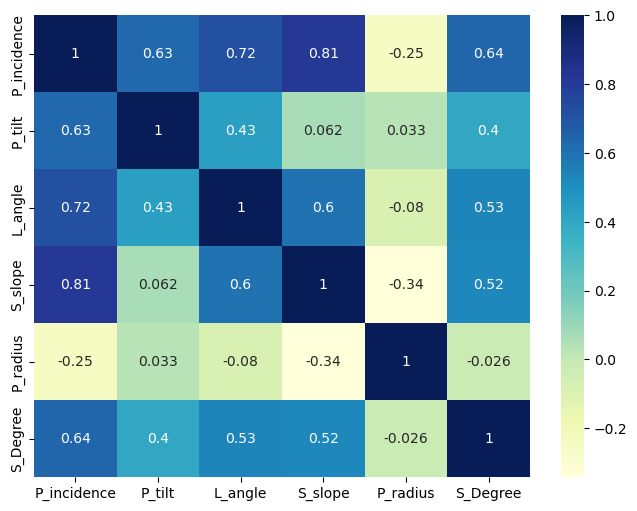

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(combined_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

<b> Insights on correlation.
    
    Features having stronger correlation with correlation value.
    Features having weaker correlation with correlation value.

**Features with Stronger Correlation:**
- **P_incidence and S_slope:** These features exhibit a strong positive correlation with a correlation coefficient of 0.814960, indicating a significant linear relationship between them.
- **P_incidence and L_angle:** Another notable strong positive correlation is observed between P_incidence and L_angle, with a correlation coefficient of 0.717282, suggesting a considerable linear association between these variables.
- **L_angle and S_Degree:** L_angle and S_Degree also demonstrate a relatively strong positive correlation, with a correlation coefficient of 0.533667, indicating a notable linear relationship between these features.

**Features with Weaker Correlation:**
- **P_radius and S_slope:** The correlation between P_radius and S_slope is weak, with a correlation coefficient of -0.342128, suggesting a slight negative linear relationship between these variables.
- **P_incidence and P_radius:** P_incidence and P_radius also demonstrate a weak negative correlation, with a correlation coefficient of -0.247467, indicating a minimal linear association between them.
- **P_radius and L_angle:** Similarly, P_radius and L_angle display a weak negative correlation, with a correlation coefficient of -0.080344, indicating a minimal linear association between them.
- **P_radius and P_tilt:** P_radius and P_tilt exhibit a weak positive correlation, with a correlation coefficient of 0.032668, suggesting a minimal linear relationship between these variables.

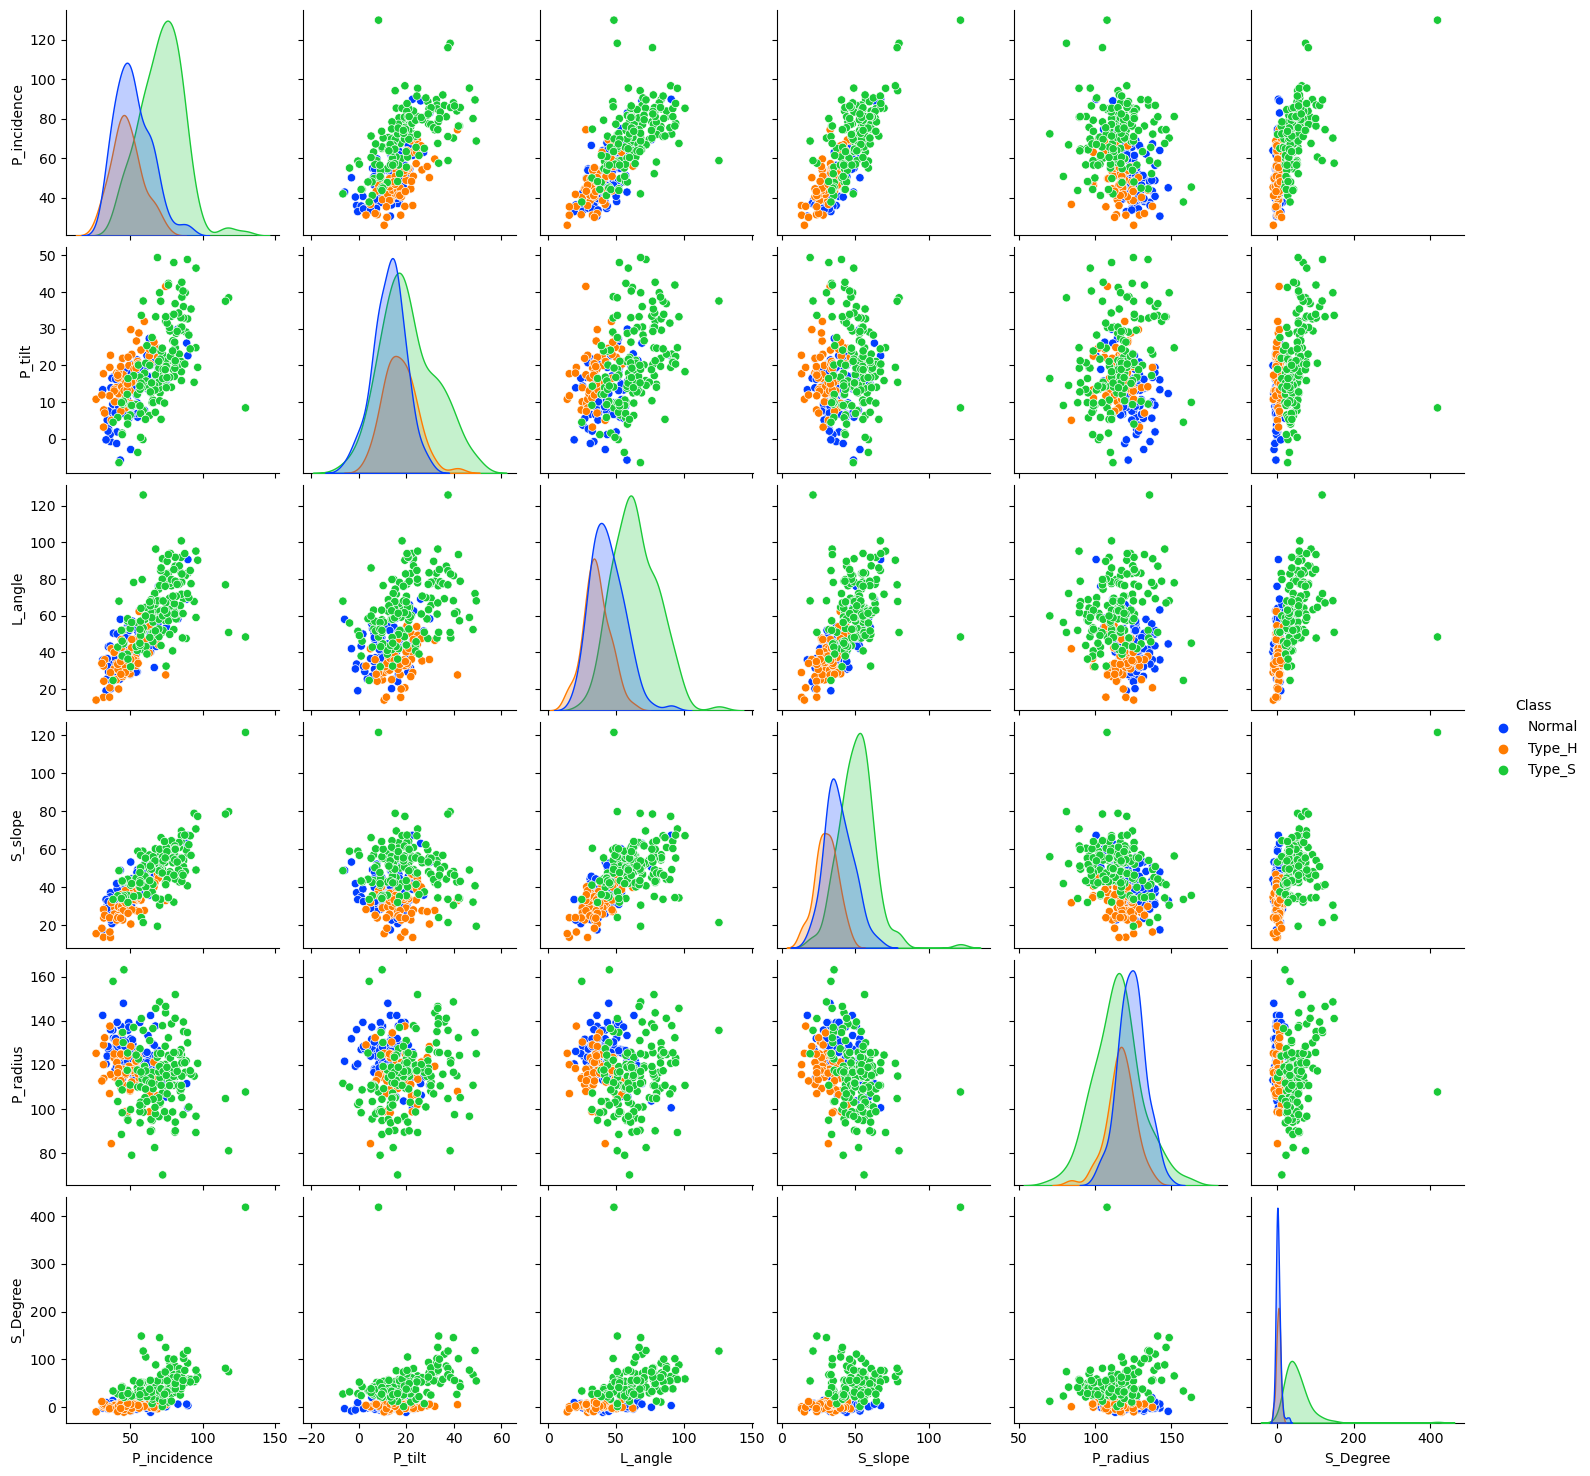

In [21]:
combined_df.reset_index(drop=True, inplace=True)
sns.pairplot(combined_df, hue='Class', palette='bright')

In the "Type_S" category, there are notable peaks for each variable, indicating a potential presence of outliers within this category across the board.

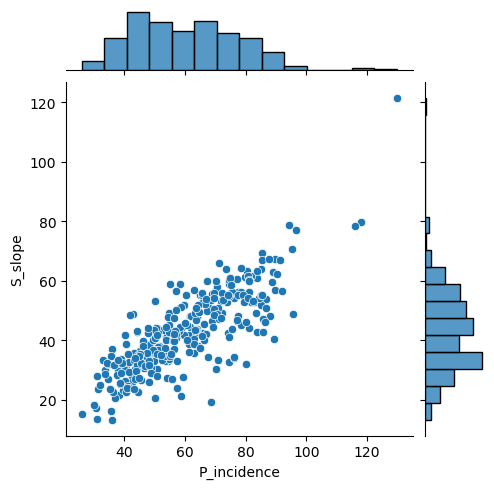

In [22]:
sns.jointplot(x='P_incidence', y='S_slope', data=combined_df, kind='scatter', height=5)

- The distribution of values for 'S_slope' is primarily concentrated between 20 and 70.
- Similarly, the distribution of values for 'P_incidence' is mostly between 20 and 100.
- There exists a positive correlation between 'S_slope' and 'P_incidence', indicating that as one variable increases, the other tends to increase as well.

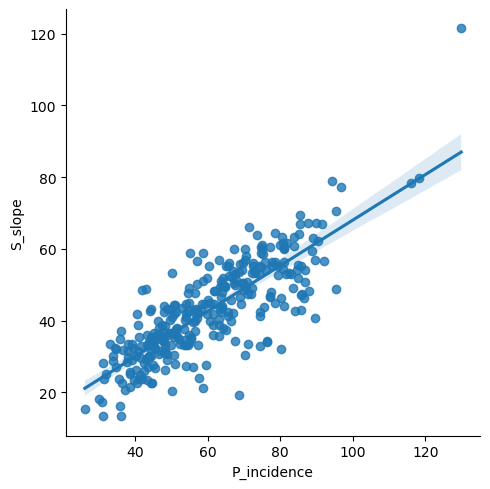

In [23]:
sns.lmplot(x='P_incidence', y='S_slope', data=combined_df, height=5)

The plot above confirms that there is a positive correlation and linear relationship between 'S_slope' and 'P_incidence'. As P_incidence increases, so does the probability for S_slope to increase.

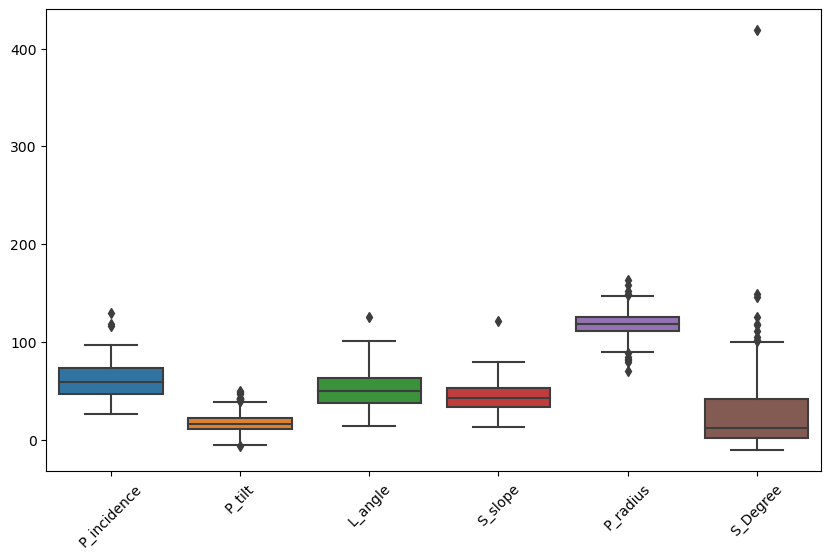

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.xticks(rotation=45)
plt.show()

There are numerous outliers present in each feature of the dataset. 

for P_incidence, L_angle, S_slope, P_radius and S_Degree, the outliers are just above 100. For P_tilt it is under 100.

Tt is crucial to address these outliers before constructing the machine learning model, as they have the potential to influence the model's performance and the subsequent projections.

In [25]:
# Calculating the number of outliers for each numeric feature

print("Number of outliers in each feature:")
for col in combined_df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = combined_df[col].quantile(0.25)
    q3 = combined_df[col].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr
    outliers_count = len(combined_df[col][(combined_df[col] > upper_fence) | (combined_df[col] < lower_fence)])
    print(f"\t- {col}: {outliers_count} outliers")

Number of outliers in each feature:
	- P_incidence: 3 outliers
	- P_tilt: 13 outliers
	- L_angle: 1 outliers
	- S_slope: 1 outliers
	- P_radius: 11 outliers
	- S_Degree: 10 outliers


In [26]:
# Imputing outliers with mean value and count outliers after imputation

print("Number of outliers in each feature after imputation:")
columns = ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']
for col in columns:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    # Impute outliers with mean value
    df_include = combined_df.loc[(combined_df[col] >= lower_fence) & (combined_df[col] <= upper_fence)]
    mean = df_include[col].mean()
    combined_df[col] = np.where(combined_df[col] > upper_fence, mean, combined_df[col])
    combined_df[col] = np.where(combined_df[col] < lower_fence, mean, combined_df[col])
    
    # Count outliers after imputation
    outliers_after_imputation = combined_df[(combined_df[col] > upper_fence) | (combined_df[col] < lower_fence)][col]
    print(f"\t- {col}: {len(outliers_after_imputation)} outliers")

Number of outliers in each feature after imputation:
	- P_incidence: 0 outliers
	- P_tilt: 0 outliers
	- L_angle: 0 outliers
	- S_slope: 0 outliers
	- P_radius: 0 outliers
	- S_Degree: 0 outliers


We see that there no outliers in the dataset anymore and we can now proceed with the next steps in the model building process.

### <b> 4. Model Building: </b>

Before splitting the data into X and Y, we will first encode the target feature 'Class' with numeric values

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined_df['Class']= encoder.fit_transform(combined_df['Class'])
print("Original 'Class' Labels and Encoded Values:")
for label, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    print(f"{label}: {encoded_value}")

Original 'Class' Labels and Encoded Values:
Normal: 0
Type_H: 1
Type_S: 2


In [28]:
X = combined_df.drop('Class', axis=1)
Y = combined_df['Class']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

We will now scale the data using StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We will now train the model using KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,Y_train)

Y_train_pred = knn.predict(X_train_scaled)
Y_test_pred = knn.predict(X_test_scaled)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Classification Report for Training Data:")
print(classification_report(Y_train, Y_train_pred))

print("\nClassification Report for Testing Data:")
print(classification_report(Y_test, Y_test_pred))

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy Score for Training Data:", train_accuracy)
print("Accuracy Score for Testing Data:", test_accuracy)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        83
           1       0.77      0.76      0.76        45
           2       0.96      0.95      0.95       120

    accuracy                           0.88       248
   macro avg       0.86      0.85      0.85       248
weighted avg       0.88      0.88      0.88       248


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56        17
           1       0.56      0.67      0.61        15
           2       1.00      0.83      0.91        30

    accuracy                           0.73        62
   macro avg       0.69      0.70      0.69        62
weighted avg       0.76      0.73      0.74        62

Accuracy Score for Training Data: 0.8830645161290323
Accuracy Score for Testing Data: 0.7258064516129032


The Accuracy of the model is 88% on the Training data and 73% on the testing data.

In [34]:
train_conf_matrix = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)

test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
print("\nConfusion Matrix for Testing Data:")
print(test_conf_matrix)

Confusion Matrix for Training Data:
[[ 71   8   4]
 [ 10  34   1]
 [  4   2 114]]

Confusion Matrix for Testing Data:
[[10  7  0]
 [ 5 10  0]
 [ 4  1 25]]


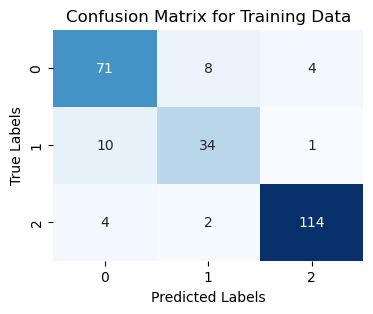

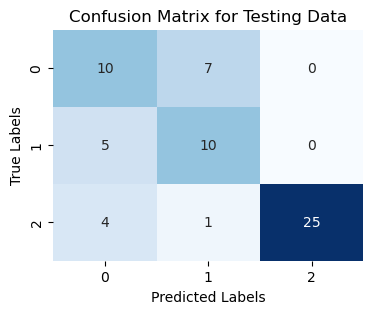

In [35]:
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Confusion Matrix for Training Data")

plot_confusion_matrix(test_conf_matrix, "Confusion Matrix for Testing Data")

From the confusion matrices above:

### Training Data:
- Class '0' (True Negatives): 71 instances were correctly predicted as class 0.
- Class '1' (False Positives): 8 instances of class 1 were incorrectly predicted as class 0.
- Class '2' (False Positives): 4 instances of class 2 were incorrectly predicted as class 0.
- Class '1' (False Negatives): 10 instances of class 0 were incorrectly predicted as class 1.
- Class '2' (True Positives): 34 instances were correctly predicted as class 1.
- Class '0' (False Negatives): 4 instances of class 0 were incorrectly predicted as class 2.
- Class '1' (False Negatives): 2 instances of class 1 were incorrectly predicted as class 2.
- Class '2' (True Positives): 114 instances were correctly predicted as class 2.

### Testing Data:
- Class '0' (True Negatives): 10 instances were correctly predicted as class 0.
- Class '1' (False Positives): 7 instances of class 1 were incorrectly predicted as class 0.
- Class '2' (False Positives): 5 instances of class 2 were incorrectly predicted as class 0.
- Class '1' (False Negatives): 5 instances of class 0 were incorrectly predicted as class 1.
- Class '2' (True Positives): 10 instances were correctly predicted as class 1.
- Class '0' (False Negatives): 4 instances of class 0 were incorrectly predicted as class 2.
- Class '2' (False Negatives): 1 instance of class 1 was incorrectly predicted as class 2.
- Class '2' (True Positives): 25 instances were correctly predicted as class 2.

These key points provide insights into the performance of the classifier on both the training and testing datasets. There is opportunity to improve performance by tuning various parameters in the model.

### <b> 5. Performance Improvement: </b>

- `param_grid` defines the grid of hyperparameters to search over.
- `GridSearchCV` performs an exhaustive search over the specified parameter grid.
- The best parameters found by grid search are printed.
- The best estimator is then used for prediction.

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1, 30, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'minkowski', 'manhattan']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

grid_search.fit(X_train_scaled, Y_train)

print("Best Parameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
train_preds = best_knn.predict(X_train_scaled)
test_preds = best_knn.predict(X_test_scaled)

print("Classification Report for Training Data:")
print(classification_report(Y_train, train_preds))

print("\nClassification Report for Testing Data:")
print(classification_report(Y_test, test_preds))

train_accuracy_grid = accuracy_score(Y_train, train_preds)
test_accuracy_grid = accuracy_score(Y_test, test_preds)
print("Accuracy Score for Training Data:", train_accuracy_grid)
print("Accuracy Score for Testing Data:", test_accuracy_grid)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        83
           1       0.77      0.80      0.78        45
           2       0.97      0.93      0.95       120

    accuracy                           0.89       248
   macro avg       0.86      0.87      0.86       248
weighted avg       0.89      0.89      0.89       248


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.60      0.80      0.69        15
           2       1.00      0.83      0.91        30

    accuracy                           0.76        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.79      0.76      0.77        62

Accuracy Score for Training Data: 0.8870967741935484
Accuracy Score for Tes

Accuracy was considered as the most relevant metric for evaluation. 

With Hyper-parameter tuning, we see an improvement of the overall scores.

Accuracy on training dataset did not increase much (0.45%)

However, Accuracy increased on the testing dataset by 4.45%. This ensures that the model is now a better fit on the training AND testing data alike.

Parameters 'n_neighbors' and 'cv' were the most important hyper-parameters that would drive an change in the model output and accuracy of projections. 'n_neighbors' value of 5 'cv' of 10 reported the best performance.

## Part B

<b>DOMAIN:</b> Banking, Marketing

<b>CONTEXT:</b> A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

<b>DATA DICTIONARY:</b> 
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

<b>PROJECT OBJECTIVE:</b> Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

### <b> 1. Data Understanding and Preparation: </b>

In [37]:
data1 = pd.read_csv("Data1.csv")
data2 = pd.read_csv("Data2.csv")

In [38]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [39]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [40]:
print("Data1:")
print("Shape:", data1.shape)
print("Column Names:", data1.columns.tolist())
print("Data Types:")
print(data1.dtypes)

print("\nData2:")
print("Shape:", data2.shape)
print("Column Names:", data2.columns.tolist())
print("Data Types:")
print(data2.dtypes)

Data1:
Shape: (5000, 8)
Column Names: ['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level']
Data Types:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

Data2:
Shape: (5000, 7)
Column Names: ['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
Data Types:
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [41]:
# Merging data1 and data2 on the 'ID' feature
merged_df = data1.merge(data2, on='ID', how='inner')

print("Merged DataFrame:")
merged_df.head()

Merged DataFrame:


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [43]:
features_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

merged_df[features_to_convert] = merged_df[features_to_convert].astype('object')

print("Datatypes after conversion:")
print(merged_df[features_to_convert].dtypes)

Datatypes after conversion:
CreditCard             object
InternetBanking        object
FixedDepositAccount    object
Security               object
Level                  object
HiddenScore            object
dtype: object


### <b> 2. Data Exploration and Analysis: </b>

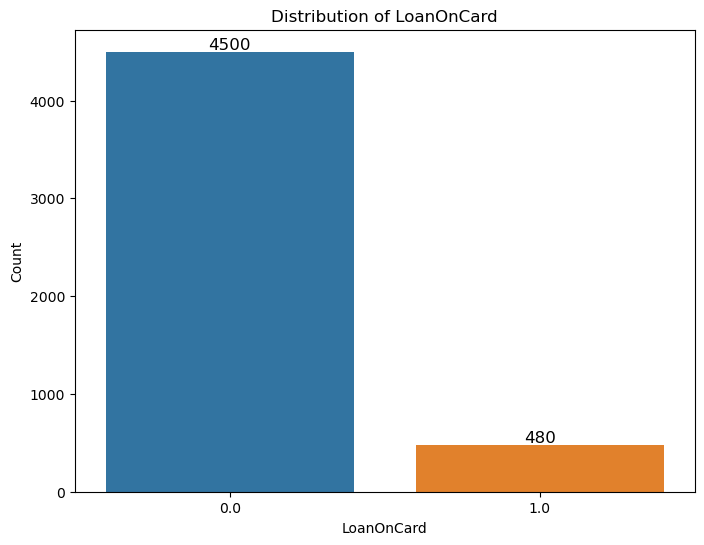

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='LoanOnCard', data=merged_df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.show()

From the depicted plot above, it's evident that there's a notable imbalance in class distribution. The count for Class '0' is substantially higher compared to that of Class '1'.

In [45]:
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [46]:
# Imputing missing values with mode for 'LoanOnCard' column
mode_loan_on_card = merged_df['LoanOnCard'].mode()[0]
merged_df['LoanOnCard'].fillna(mode_loan_on_card, inplace=True)

missing_values_after_imputation = merged_df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64


Choosing to imputie the outlier values with mode. Hence 0.4% of values for the target variable 'LoanOncard' are now imputed with the mode value resulting in 0 missing in the merged DataFrame.

In [47]:
print('The unique values in the', merged_df.columns.values[5],':', merged_df['HiddenScore'].unique())
print('The unique values in the', merged_df.columns.values[7],':', merged_df['Level'].unique())
print('The unique values in the', merged_df.columns.values[9],':', merged_df['Security'].unique())
print('The unique values in the', merged_df.columns.values[10],':', merged_df['FixedDepositAccount'].unique())
print('The unique values in the', merged_df.columns.values[11],':', merged_df['InternetBanking'].unique())
print('The unique values in the', merged_df.columns.values[12],':', merged_df['CreditCard'].unique())

The unique values in the HiddenScore : [4 3 1 2]
The unique values in the Level : [1 2 3]
The unique values in the Security : [1 0]
The unique values in the FixedDepositAccount : [0 1]
The unique values in the InternetBanking : [0 1]
The unique values in the CreditCard : [0 1]


All categorical variables contain anticipated values without any surprises.

### <b> 3. Data Preparation and model building: </b>

Will split the data into X (feature) and Y (target)

In [48]:
feature = merged_df.drop(labels=['ID', 'ZipCode', 'LoanOnCard'], axis=1)
target = merged_df['LoanOnCard']

In [49]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=365)

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1056) 
lr.fit(feature_train, target_train)

LogisticRegression(max_iter=1056)

In [51]:
from sklearn import metrics

target_pred = lr.predict(feature_test)
print('Confusion metrics: \n', metrics.confusion_matrix(target_test, target_pred))
print('\n')
print('Classification Report: \n', metrics.classification_report(target_test, target_pred))
print('\n')
print('ROC_AUC score:', metrics.roc_auc_score(target_test, target_pred).round(2))

Confusion metrics: 
 [[1107   13]
 [  52   78]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1120
         1.0       0.86      0.60      0.71       130

    accuracy                           0.95      1250
   macro avg       0.91      0.79      0.84      1250
weighted avg       0.94      0.95      0.94      1250



ROC_AUC score: 0.79


While achieving an accuracy of 95%, it's noteworthy that the recall is low for the 'positive' class. This suggests a bias towards the majority class of 'negative' in our model. A ROC_AUC score of 0.79 indicates that the model performs reasonably well in distinguishing between the classes, but we need higher scores, and effectively need to drive better performance from the model to increase appropriate classification.

<b> We will now balance the data using the right balancing technique.

In [52]:
percent_dist_tv = (merged_df.LoanOnCard.value_counts()/merged_df.LoanOnCard.value_counts().sum())*100
percent_dist_tv

0.0    90.4
1.0     9.6
Name: LoanOnCard, dtype: float64

- There is an imbalanced distribution of classes in the target variable:
  - 90.4% belong to class '0.0'.
  - 9.6% belong to class '1.0'.
- To address this issue, we will employ an oversampling technique called SMOTE.

In [53]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
feature_train_res, target_train_res = smote.fit_resample(feature_train, target_train)

In [54]:
target_train_res.value_counts()

0.0    3400
1.0    3400
Name: LoanOnCard, dtype: int64

We have now achieved a balanced distribution of the target variable, with an equal representation of both classes, resulting in a 50:50 ratio.

<b> Again training the model using the balanced data.

In [55]:
lr.fit(feature_train_res, target_train_res)

LogisticRegression(max_iter=1056)

In [56]:
target_pred1 = lr.predict(feature_test)
print('Confusion metrics: \n', metrics.confusion_matrix(target_test, target_pred1))
print('\n')
print('Classification Report: \n', metrics.classification_report(target_test, target_pred1))
print('\n')
print('ROC_AUC score:', metrics.roc_auc_score(target_test, target_pred1).round(2))

Confusion metrics: 
 [[1029   91]
 [  17  113]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1120
         1.0       0.55      0.87      0.68       130

    accuracy                           0.91      1250
   macro avg       0.77      0.89      0.81      1250
weighted avg       0.94      0.91      0.92      1250



ROC_AUC score: 0.89


- Despite a slight accuracy decrease, there's an uptick in the recall score for the minority class.
- The ROC_AUC score has improved, climbing from 0.79 to 0.89.

### <b> 4. Performance Improvement: </b>

In [57]:
# SVM model
from sklearn.svm import SVC
svm_base_model = SVC()
svm_base_model.fit(feature_train, target_train)

# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_base_model = KNeighborsClassifier()
knn_base_model.fit(feature_train, target_train)

KNeighborsClassifier()

In [58]:
# Tuning parameters for svm model with default kernel 'rbf' using different values of 'C' and 'gamma'
c_values = []
gamma_values = []
accuracy = []
precision = []
recall = []
f1_score = []
C = [0.001,0.01,0.1,1,100,1000]
gamma = [0.001,0.01,0.1,1,100,1000]

for i in C:
    for j in gamma:
        svm_model = SVC(C=i, gamma=j)
        svm_model.fit(feature_train, target_train)
        pred = svm_model.predict(feature_test)
        c_values.append(i)
        gamma_values.append(j)
        accuracy.append(metrics.accuracy_score(target_test,pred))
        precision.append(metrics.precision_score(target_test,pred, zero_division=0))
        recall.append(metrics.recall_score(target_test,pred))
        f1_score.append(metrics.f1_score(target_test,pred))

In [59]:
# Creating a score table with different values of 'C' and 'gamma'
d = {'C': c_values, 'Gamma': gamma_values, 'Accuracy': accuracy, 'Precision': precision,
'Recall': recall, 'f1-score': f1_score}
pd.DataFrame(data=d)

,C,Gamma,Accuracy,Precision,Recall,f1-score
0,0.001,0.001,0.8960,0.000000,0.000000,0.000000
1,0.001,0.010,0.8960,0.000000,0.000000,0.000000
2,0.001,0.100,0.8960,0.000000,0.000000,0.000000
3,0.001,1.000,0.8960,0.000000,0.000000,0.000000
4,0.001,100.000,0.8960,0.000000,0.000000,0.000000
5,0.001,1000.000,0.8960,0.000000,0.000000,0.000000
6,0.010,0.001,0.8960,0.000000,0.000000,0.000000
7,0.010,0.010,0.8960,0.000000,0.000000,0.000000
8,0.010,0.100,0.8960,0.000000,0.000000,0.000000
9,0.010,1.000,0.8960,0.000000,0.000000,0.000000


According to the provided dataframe, it seems that the SVM model with C=1000 and gamma=0.001 attains the highest levels of accuracy, precision, recall, and f1 score.

In [60]:
# Tuning parameters of the knn model
weights_param = []
n_neighbors_param = []
accuracy_knn = []
precision_knn = []
recall_knn = []
f1_score_knn = []
weights = ['uniform', 'distance']
n_neighbors = [num for num in list(range(1,40)) if num % 2 != 0]

for w in weights:
    for n in n_neighbors:
        knn_model = KNeighborsClassifier(n_neighbors=n, weights=w)
        knn_model.fit(feature_train, target_train)
        pred_knn = knn_model.predict(feature_test)
        weights_param.append(w)
        n_neighbors_param.append(n)
        accuracy_knn.append(metrics.accuracy_score(target_test,pred_knn))
        precision_knn.append(metrics.precision_score(target_test,pred_knn))
        recall_knn.append(metrics.recall_score(target_test,pred_knn))
        f1_score_knn.append(metrics.f1_score(target_test,pred_knn))

In [61]:
# Creating a score table with different values of 'Weights' and 'K'
p = {'Weights': weights_param, 'K-Value': n_neighbors_param, 'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'f1-score': f1_score_knn}
pd.DataFrame(data=p)

,Weights,K-Value,Accuracy,Precision,Recall,f1-score
0,uniform,1,0.9072,0.576087,0.407692,0.477477
1,uniform,3,0.9152,0.642857,0.415385,0.504673
2,uniform,5,0.9080,0.602740,0.338462,0.433498
3,uniform,7,0.9096,0.626866,0.323077,0.426396
4,uniform,9,0.9096,0.639344,0.300000,0.408377
5,uniform,11,0.9096,0.654545,0.276923,0.389189
6,uniform,13,0.9032,0.576271,0.261538,0.359788
7,uniform,15,0.9048,0.593220,0.269231,0.370370
8,uniform,17,0.9056,0.615385,0.246154,0.351648
9,uniform,19,0.9032,0.581818,0.246154,0.345946


The dataframe above suggests that the KNN model with weights='distance' and n_neighbors=3 achieves the highest levels of accuracy, precision, recall, and f1 score.

<b> After evaluating both the SVM and KNN models, it's evident that the SVM model outperforms the KNN model, demonstrating higher accuracy, precision, recall, and f1 score. As a result, we have selected the SVM model with C=1000 and gamma=0.001 as our final choice.

In [62]:
svm_final = SVC(C=1000, gamma=0.001)
svm_final.fit(feature_train, target_train)
pred_final = svm_final.predict(feature_test)
print('Confusion Matrix of the final model: \n', metrics.confusion_matrix(target_test, pred_final))
print('\n')

print('Classification Report of the final model: \n', metrics.classification_report(target_test, pred_final))

print('\n')
print('ROC_AUC Score of the final model:', metrics.roc_auc_score(target_test, pred_final).round(2))


Confusion Matrix of the final model: 
 [[1106   14]
 [  37   93]]


Classification Report of the final model: 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1120
         1.0       0.87      0.72      0.78       130

    accuracy                           0.96      1250
   macro avg       0.92      0.85      0.88      1250
weighted avg       0.96      0.96      0.96      1250



ROC_AUC Score of the final model: 0.85


<b> Improvements achieved from base model to final model.

In [63]:
pred_base = svm_base_model.predict(feature_test)
print('Confusion Matrix of the svm base model: \n', metrics.confusion_matrix(target_test, pred_base))
print('\n')
print('Classification Report of the svm base model: \n', metrics.classification_report(target_test, pred_base))
print('\n')
print('ROC_AUC Score of the svm base model:', metrics.roc_auc_score(target_test, pred_base).round(2))
print('\n')
print('Note: this is the base model, the model in 4.C. is the final model.')

Confusion Matrix of the svm base model: 
 [[1117    3]
 [ 116   14]]


Classification Report of the svm base model: 
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1120
         1.0       0.82      0.11      0.19       130

    accuracy                           0.90      1250
   macro avg       0.86      0.55      0.57      1250
weighted avg       0.90      0.90      0.87      1250



ROC_AUC Score of the svm base model: 0.55


Note: this is the base model, the model in 4.C. is the final model.


**Improvements Achieved from Base to Final Model (Base vs. Optimized):**
- **Accuracy Enhancement:** The accuracy of the final model experienced a notable improvement, elevating from 0.90 in the base model to 0.96 in the final iteration.
- **Elimination of Bias:** Unlike the base model, the final model demonstrates a balanced performance across all classes, indicating an absence of bias towards any specific class.
- **Enhanced Precision, Recall, and f1-score:** The precision, recall, and f1-score metrics witnessed enhancements in the final model compared to the base model, signifying an overall improvement in classification performance.
- **Substantial ROC_AUC Score Improvement:** The ROC_AUC score exhibited a significant advancement, escalating from 0.55 in the base model to 0.85 in the final model, suggesting enhanced classification ability and model effectiveness.

## End Of Project